In [97]:
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np
import scipy as sp 
import math 

In [98]:
kibergrad = pd.read_csv('Kibergrad.csv')

In [99]:
#print(nakljucni_vzorec_200.columns)

In [100]:

nakljucni_vzorec_200 = kibergrad.sample(n=200)
print(nakljucni_vzorec_200)

# Očisti imena stolpcev: odstrani dvojne enojne narekovaje in presledke
nakljucni_vzorec_200.columns = nakljucni_vzorec_200.columns.str.replace("'", "").str.strip()

# Filtriranje vrstic, kjer je izobrazba <= 38
stevilo_do_38 = nakljucni_vzorec_200[nakljucni_vzorec_200['IZOBRAZBA'] <= 38].shape[0]

# Izpis rezultata
print(f"Število oseb z izobrazbo največ 38: {stevilo_do_38}")
delez_brez_srednje = stevilo_do_38 / 200
print(f"Vzorčni delež oseb z izobrazbo največ 38: {delez_brez_srednje}")

       'TIP'  'CLANOV'  'OTROK'  'DOHODEK'  'CETRT'  'IZOBRAZBA'
16667      1         2        0      59757        2           39
30086      2         2        1      12000        3           40
14461      1         2        0      45840        2           34
254        1         2        0      25838        1           39
9878       1         2        0      30000        1           39
...      ...       ...      ...        ...      ...          ...
11753      3         4        0      42768        2           34
39702      1         3        0      43112        4           39
783        1         5        3      21000        1           40
12030      1         2        0      20427        2           39
9058       3         2        0       3000        1           39

[200 rows x 6 columns]
Število oseb z izobrazbo največ 38: 40
Vzorčni delež oseb z izobrazbo največ 38: 0.2


Uporabimo formulo za standardno napako deleža:

$$\sqrt{\frac{\hat p (1- \hat p)}{n} \cdot \frac{N-n}{N-1}},$$

kjer je $\hat p$ vzorčni delež, $N$ velikost populacije in $n$ velikost vzorca. 
Faktor $\frac{N-n}{N-1}$ pod korenom je popravek za končne populacije.

 (Vir: John A. Rice: Mathematical Statistics and data analysis, 1995, razdelek 7.3.2, stran 199)

In [101]:
standardna_napaka =  math.sqrt(delez_brez_srednje * (1 - delez_brez_srednje) * (43886 -200) / (200 * 43885))
print(f"standardna napaka: {standardna_napaka}")

standardna napaka: 0.028220069751673824


Po istem viru kot prej, je interval zaupanja za vzorčni delež:

$$ \hat p \pm \Phi ^{-1}\left(1- \frac {\alpha}{2}\right)\sqrt{\frac{\hat p (1- \hat p)}{n} \cdot \frac{N-n}{N-1}},$$

kar pri stopnji zaupanja 95% da:

$$\hat p \pm 1.96 \sqrt{\frac{\hat p (1- \hat p)}{n} \cdot \frac{N-n}{N-1}}.$$

In [102]:
sp_meja = delez_brez_srednje - 1.96*standardna_napaka
zg_meja = delez_brez_srednje + 1.96*standardna_napaka

In [103]:
print((sp_meja, zg_meja))

(0.1446886632867193, 0.2553113367132807)


In [104]:

populacija = kibergrad.sample(n=43886)

populacija.columns = populacija.columns.str.replace("'", "").str.strip()

# Filtriranje vrstic, kjer je izobrazba <= 38
populacija_stevilo_do_38 = populacija[populacija['IZOBRAZBA'] <= 38].shape[0]
print(populacija_stevilo_do_38)

9282


In [105]:
delez = populacija_stevilo_do_38/43886
print(delez)

0.21150252928040833


[np.float64(0.15), np.float64(0.215), np.float64(0.195), np.float64(0.185), np.float64(0.215), np.float64(0.225), np.float64(0.16), np.float64(0.165), np.float64(0.225), np.float64(0.175), np.float64(0.175), np.float64(0.205), np.float64(0.225), np.float64(0.175), np.float64(0.19), np.float64(0.23), np.float64(0.215), np.float64(0.23), np.float64(0.225), np.float64(0.175), np.float64(0.18), np.float64(0.205), np.float64(0.175), np.float64(0.195), np.float64(0.205), np.float64(0.21), np.float64(0.235), np.float64(0.225), np.float64(0.19), np.float64(0.2), np.float64(0.24), np.float64(0.2), np.float64(0.23), np.float64(0.25), np.float64(0.19), np.float64(0.23), np.float64(0.225), np.float64(0.165), np.float64(0.215), np.float64(0.205), np.float64(0.2), np.float64(0.18), np.float64(0.205), np.float64(0.2), np.float64(0.215), np.float64(0.245), np.float64(0.225), np.float64(0.2), np.float64(0.25), np.float64(0.21), np.float64(0.235), np.float64(0.2), np.float64(0.245), np.float64(0.195), n

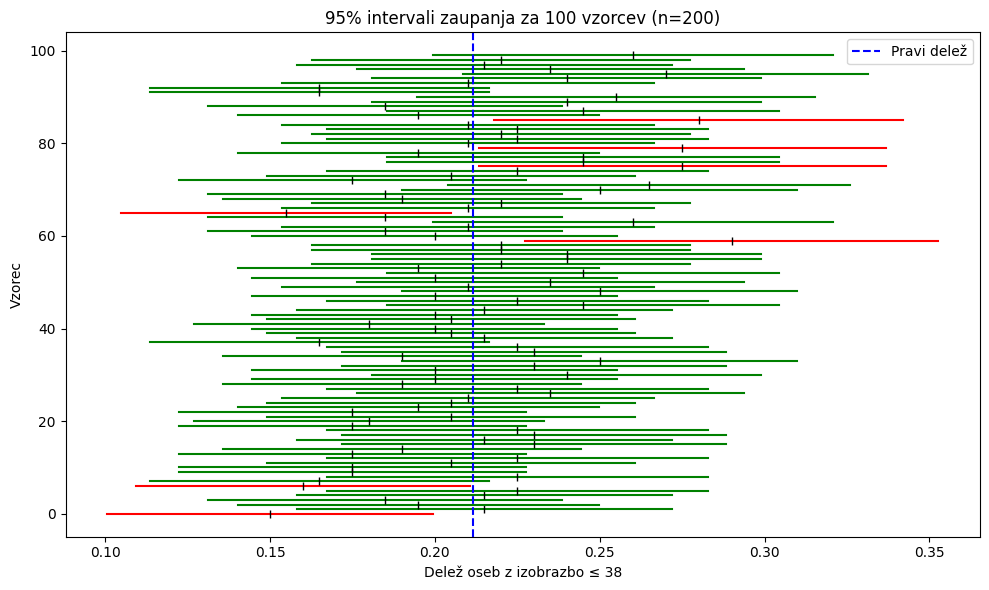

Število intervalov, ki zajamejo pravi delež: 93


In [106]:
import math
import matplotlib.pyplot as plt

intervali = []
zajeti = []
delezi =[]

n = 200
alpha = 0.05  # za 95% interval zaupanja

for i in range(100):  # 100 vzorcev
    vzorec = kibergrad.sample(n=n)
    vzorec.columns = vzorec.columns.str.replace("'", "").str.strip()
    
    # Preštej, koliko ima izobrazbo <= 38
    stevilo_do_38 = (vzorec['IZOBRAZBA'] <= 38).sum()
    delez_brez_srednje = stevilo_do_38 / n
    
    # Standardna napaka za delež
    standardna_napaka = math.sqrt(delez_brez_srednje * (1 - delez_brez_srednje) * (43886 - n) / (n * 43885))
    
    # Interval zaupanja (95%)
    levo = delez_brez_srednje - 1.96 * standardna_napaka
    desno = delez_brez_srednje + 1.96 * standardna_napaka
    
    # Dodaj interval in standard error (SE) v seznam
    intervali.append((levo, desno, delez_brez_srednje))
    
    # Preveri, če pravi delež (lahko uporabiš npr. povprečje celotnih podatkov) spada v interval
    # Tukaj bomo privzeli, da je prava vrednost povprečje celotnega podatka:
    prava_vrednost = (kibergrad['\'IZOBRAZBA\''] <= 38).mean()
    zajeti.append(levo <= prava_vrednost <= desno)
    delezi.append(delez_brez_srednje)
delezi.append(delez_brez_srednje)
print(delezi)

# Izris grafa
plt.figure(figsize=(10, 6))
for i, (levo, desno, SE) in enumerate(intervali):
    barva = 'green' if zajeti[i] else 'red'
    plt.plot([levo, desno], [i, i], color=barva)
    plt.plot(SE, i, 'k|', markersize=6)

plt.axvline(x=prava_vrednost, color='blue', linestyle='--', label='Pravi delež')
plt.xlabel('Delež oseb z izobrazbo ≤ 38')
plt.ylabel('Vzorec')
plt.title('95% intervali zaupanja za 100 vzorcev (n=200)')
plt.legend()
plt.tight_layout()
plt.show()

print("Število intervalov, ki zajamejo pravi delež:", sum(zajeti))


In [107]:
#Poračunamo standardni odklon:
std_odklon = np.std(delezi, ddof=1)

print(std_odklon)

0.02983311669077082


Še na 100 večjih vzorcih (800 družin)

[np.float64(0.2175), np.float64(0.1975), np.float64(0.21375), np.float64(0.2225), np.float64(0.19375), np.float64(0.20625), np.float64(0.245), np.float64(0.24375), np.float64(0.20875), np.float64(0.205), np.float64(0.23125), np.float64(0.21), np.float64(0.20875), np.float64(0.20125), np.float64(0.215), np.float64(0.21125), np.float64(0.1675), np.float64(0.22625), np.float64(0.19125), np.float64(0.22125), np.float64(0.20875), np.float64(0.2125), np.float64(0.21), np.float64(0.21125), np.float64(0.20875), np.float64(0.205), np.float64(0.2025), np.float64(0.21), np.float64(0.205), np.float64(0.225), np.float64(0.215), np.float64(0.19375), np.float64(0.20125), np.float64(0.21875), np.float64(0.2075), np.float64(0.2), np.float64(0.21125), np.float64(0.2125), np.float64(0.21375), np.float64(0.22375), np.float64(0.2025), np.float64(0.23375), np.float64(0.21625), np.float64(0.2325), np.float64(0.2025), np.float64(0.1825), np.float64(0.1875), np.float64(0.23375), np.float64(0.2175), np.float64(

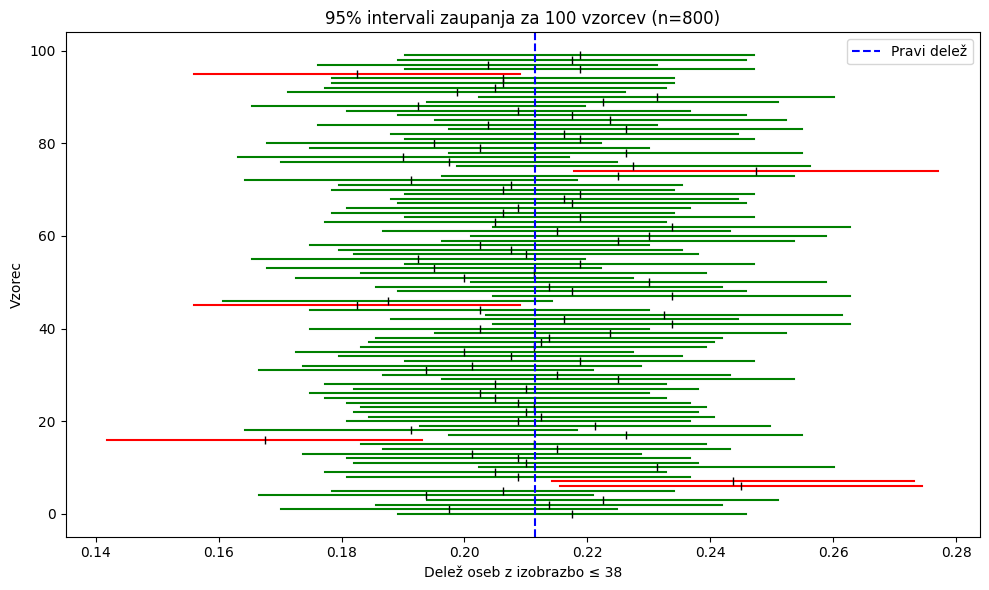

Število intervalov, ki zajamejo pravi delež: 94


In [108]:
intervali = []
zajeti = []
delezi =[]

n = 800
alpha = 0.05  # za 95% interval zaupanja

for i in range(100):  # 100 vzorcev
    vzorec = kibergrad.sample(n=n)
    vzorec.columns = vzorec.columns.str.replace("'", "").str.strip()
    
    # Preštej, koliko ima izobrazbo <= 38
    stevilo_do_38 = (vzorec['IZOBRAZBA'] <= 38).sum()
    delez_brez_srednje = stevilo_do_38 / n
    
    # Standardna napaka za delež
    standardna_napaka = math.sqrt(delez_brez_srednje * (1 - delez_brez_srednje) * (43886 - n) / (n * 43885))
    
    # Interval zaupanja (95%)
    levo = delez_brez_srednje - 1.96 * standardna_napaka
    desno = delez_brez_srednje + 1.96 * standardna_napaka
    
    # Dodaj interval in standard error (SE) v seznam
    intervali.append((levo, desno, delez_brez_srednje))
    
    # Preveri, če pravi delež (lahko uporabiš npr. povprečje celotnih podatkov) spada v interval
    # Tukaj bomo privzeli, da je prava vrednost povprečje celotnega podatka:
    prava_vrednost = (kibergrad['\'IZOBRAZBA\''] <= 38).mean()
    zajeti.append(levo <= prava_vrednost <= desno)
    delezi.append(delez_brez_srednje)
print(delezi)

# Izris grafa
plt.figure(figsize=(10, 6))
for i, (levo, desno, SE) in enumerate(intervali):
    barva = 'green' if zajeti[i] else 'red'
    plt.plot([levo, desno], [i, i], color=barva)
    plt.plot(SE, i, 'k|', markersize=6)

plt.axvline(x=prava_vrednost, color='blue', linestyle='--', label='Pravi delež')
plt.xlabel('Delež oseb z izobrazbo ≤ 38')
plt.ylabel('Vzorec')
plt.title('95% intervali zaupanja za 100 vzorcev (n=800)')
plt.legend()
plt.tight_layout()
plt.show()

print("Število intervalov, ki zajamejo pravi delež:", sum(zajeti))


In [109]:
#Poračunamo standardni odklon:
std_odklon = np.std(delezi, ddof=1)

print(std_odklon)

0.01384990678413732
